# Segmentation

This is a simple script to perform segmentation on the given images. The outputs are saved as `.npy` files and will be used to classify the images by their treatment type.

## Load libraries and examine sample data

In [1]:
from os import listdir
from os.path import join
from typing import Dict

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

from cellpose import models
from skimage.io import imread
from tqdm.notebook import tqdm

In [2]:
def load_images(directory: str) -> Dict[str, npt.NDArray[np.uint8]]:
    images = {name: imread(join(directory, name)) for name in listdir(directory)}
    
    return images

In [3]:
images = load_images('Data/downsampled_data')

Example Image: r09c18f07_median_aggregated.tiff


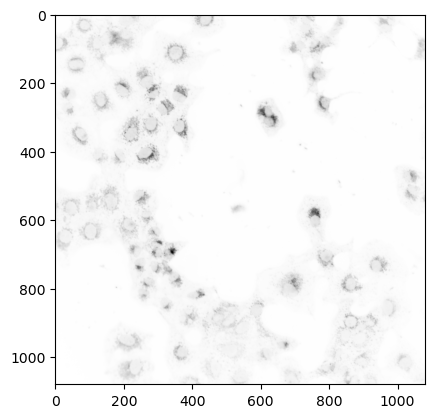

In [4]:
file_name, img = next(iter(images.items()))
_ = plt.imshow(img, cmap='Grays', label=file_name)
print(f'Example Image: {file_name}')
plt.show()

## Perform the segmentation

In [5]:
segment_model =  models.Cellpose(gpu=False, model_type='cyto2')

### Investigate a few examples to tune parameters

In [6]:
rng = np.random.default_rng(77)

In [7]:
rng.choice(list(images.keys()))

'r03c14f04_median_aggregated.tiff'

Example Image: r03c05f01_median_aggregated.tiff


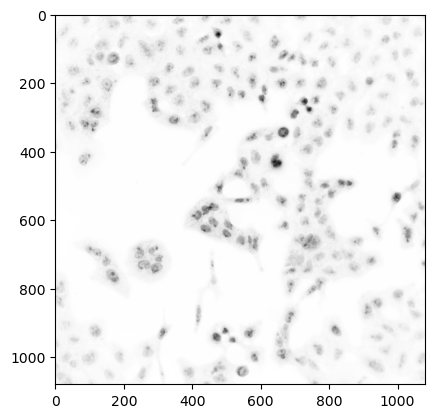

Example Mask: r03c05f01_median_aggregated.tiff


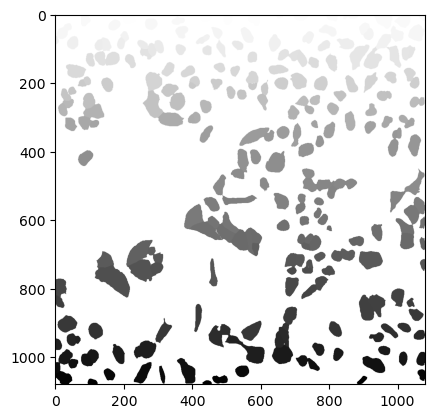

Masked Image: r03c05f01_median_aggregated.tiff


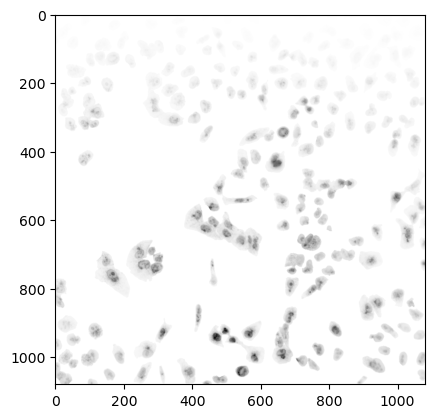

In [8]:
file_name = rng.choice(list(images.keys()))
img = images[file_name]

_ = plt.imshow(img, cmap='Grays', label=file_name)
print(f'Example Image: {file_name}')
plt.show()

mask = segment_model.eval(img)[0]
_ = plt.imshow(mask, cmap='Grays', label=file_name)
print(f'Example Mask: {file_name}')
plt.show()

_ = plt.imshow(mask * img, cmap='Grays', label=file_name)
print(f'Masked Image: {file_name}')
plt.show()

In [9]:
def save_masks(segment_model: models.Cellpose, images: Dict[str, npt.NDArray[np.uint8]], out_directory: str, **eval_kwargs):
    for (file_name, image) in tqdm(images.items()):
        masks, flows, styles, diams = segment_model.eval(image, **eval_kwargs)
        np.save(join(out_directory, file_name), masks)    

In [10]:
save_masks(segment_model, images, 'Segmented')

  0%|          | 0/2867 [00:00<?, ?it/s]

SystemError: CPUDispatcher(<function _extend_centers at 0x127a27600>) returned a result with an exception set